# Lesson 6: Vortex Lift

In [1]:
import math as mt
import numpy as np
from matplotlib import pyplot as py
%matplotlib inline
%run ./flow_functions.ipynb

In [2]:
# Defining Extent of Flow
xstart,xend,ystart,yend,N = -2.0,2.0,-1.0,1.0,100
x,y,X,Y = flowgrid(xstart,xend,ystart,yend,N)

In [3]:
# Plotting flow around the cylinder with a doublet
xdoublet,ydoublet,strength_doublet = 0.0,0.0,1.0       #location and strength of doublet
u_free = 1.0                                           #free stream velocity

u_doublet,v_doublet,psi_doublet = get_vel_psi_doublet(strength_doublet,xdoublet,ydoublet,X,Y)
U1 = u_doublet + u_free
V1 = v_doublet

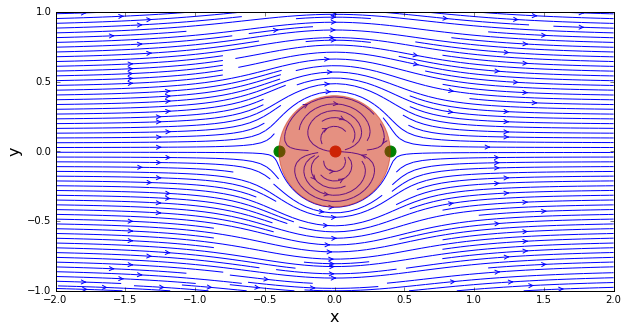

In [4]:
# Plotting
size = 10
py.figure(figsize = (size, (yend-ystart)/(xend - xstart)*size))
py.xlabel('x',fontsize = 16)
py.ylabel('y',fontsize = 16)
py.xlim(xstart,xend)
py.ylim(ystart,yend)
py.streamplot(X,Y,U1,V1, density = 2, linewidth=1, arrowsize=1, arrowstyle='->')
py.scatter(xdoublet ,ydoublet, color = '#CD2305', s=120, marker = 'o')

# calculating radius of cylinder and plotting
R = mt.sqrt(strength_doublet/(2*np.pi*u_free))
circle = py.Circle((0, 0), radius=R, color='#CD2305', alpha=0.5)
py.gca().add_patch(circle)

# Stagnation Points
xstag1,ystag1 = +np.sqrt(strength_doublet/(2*np.pi*u_free)) , 0.0
xstag2,ystag2 = -np.sqrt(strength_doublet/(2*np.pi*u_free)) , 0.0
py.scatter([xstag1,xstag2],[ystag1,ystag2],color = 'g', s=120, marker = 'o')

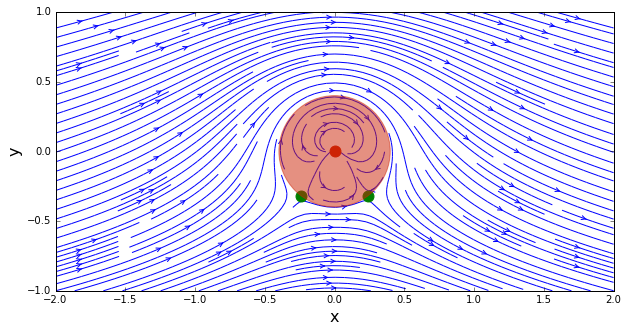

In [5]:
# introducing vortex at (0,0)
strength_vortex = 4.0
xvortex,yvortex = 0.0,0.0

u_vortex,v_vortex,psi_vortex = get_vel_psi_vortex(strength_vortex,xvortex,yvortex,X,Y)

# superposition
U = u_free + u_doublet + u_vortex
V = v_doublet + v_vortex

# plotting flow
py.figure(figsize = (size, (yend-ystart)/(xend - xstart)*size))
py.xlabel('x',fontsize = 16)
py.ylabel('y',fontsize = 16)
py.xlim(xstart,xend)
py.ylim(ystart,yend)
py.streamplot(X,Y,U,V, density = 2, linewidth=1, arrowsize=1, arrowstyle='->')
py.scatter(xdoublet ,ydoublet, color = '#CD2305', s=120, marker = 'o')
circle = py.Circle((0, 0), radius=R, color='#CD2305', alpha=0.5)
py.gca().add_patch(circle)

# stagnation points
x_stag1, y_stag1 = +mt.sqrt(R**2-(strength_vortex/(4*np.pi*u_free))**2), -strength_vortex/(4*np.pi*u_free)
x_stag2, y_stag2 = -mt.sqrt(R**2-(strength_vortex/(4*np.pi*u_free))**2), -strength_vortex/(4*np.pi*u_free)
py.scatter([x_stag1,x_stag2],[y_stag1,y_stag2],color = 'g', s=120, marker = 'o')


In [6]:
#challenge task


# Pressure

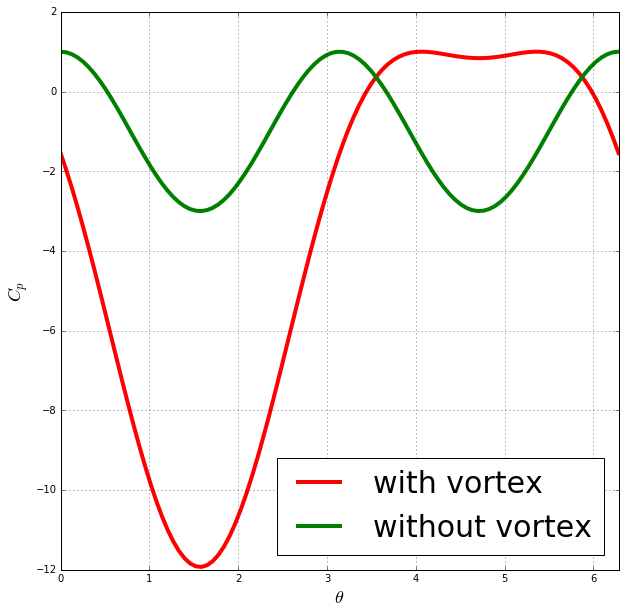

In [25]:
# calculate the surface tangential velocity on the cylinder
theta = np.linspace(0, 2*np.pi, 100)
u_theta = -2*u_free*np.sin(theta) - strength_vortex/(2*np.pi*R)

# compute the surface pressure coefficient
cp = 1.0 - (u_theta/u_free)**2

# if there was no vortex
u_theta_no_vortex = -2*u_free*np.sin(theta)
cp_no_vortex = 1.0 - (u_theta_no_vortex/u_free)**2

#plotting
py.figure(figsize = (size, size))
py.xlabel(r'$\theta$',fontsize = 18)
py.ylabel('$C_p$',fontsize = 18)
py.xlim(theta.min(),theta.max())
py.plot(theta,cp, label = 'with vortex', color = 'red', linewidth = 4)
py.plot(theta,cp_no_vortex, label = 'without vortex',color = 'g',linewidth = 4)
py.legend(loc = 'best',prop = {'size':30})
py.grid(True)

In [ ]:
#challenge task